<a href="https://colab.research.google.com/github/sisco1113/LSTM-RNN-timeseries-prediction/blob/main/LSTM_timeseries_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
# look_back: number of previous steps
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

#Show .shape of train & test
print("TrainX:", trainX.shape)
print("TrainY:", trainY.shape)
print("TestX:", testX.shape)
print("TestY:", testY.shape)

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))

TrainX: (92, 3, 1)
TrainY: (92,)
TestX: (44, 3, 1)
TestY: (44,)


In [2]:
#input_shape=(number of steps, number of features)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainPredict[:] = np.nan_to_num(trainPredict)
testPredict[:] = np.nan_to_num(testPredict)
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

#1) Compute testScore (complete O,O)
#2) Print trainScore & testScore
#YOUR WORK HERE (4 pts)
# calculate root mean squared error

print("Train Score: %f RMSE" % (trainScore))
print("Test Score: %f RMSE" % (testScore))

Epoch 1/100
92/92 - 7s - loss: 0.0284 - 7s/epoch - 78ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0121 - 488ms/epoch - 5ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0105 - 182ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0091 - 179ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0079 - 189ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0067 - 180ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0060 - 182ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0053 - 183ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0048 - 203ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0044 - 191ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0043 - 217ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0041 - 197ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0041 - 183ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0039 - 197ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0039 - 191ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0039 - 216ms/epoc

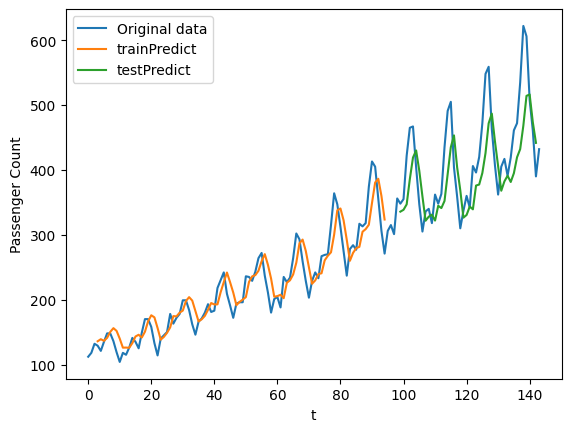

In [4]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Original data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.xlabel('t')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()